## Sentiment Analysis on IMDB Movie Reviews

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv("./train.csv")

In [2]:
df.head()

,text,label
0,grew (b. ) watch lov thunderbirds. mat school ...,0
1,"put movy dvd player, sat cok chips, expectatio...",0
2,peopl know particul tim past lik feel nee try ...,0
3,"ev though gre interest bibl movies, bor dea ev...",0
4,im die hard dad army fan noth wil ev chang tha...,1


In [3]:
df.columns

Index(['text', 'label'], dtype='object')

In [4]:
print(df.shape)

(40000, 2)


In [5]:
df["label"].value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [6]:
sentiment_label = df.label.factorize()
sentiment_label

(array([0, 0, 0, ..., 0, 1, 1]), Int64Index([0, 1], dtype='int64'))

In [7]:
reviews = df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(reviews)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(reviews)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [8]:
print(tokenizer.word_index)

{'film': 1, 'movy': 2, 'on': 3, 'lik': 4, 'act': 5, 'ev': 6, 'real': 7, 'just': 8, 'mak': 9, 'good': 10, 'see': 11, 'get': 12, 'watch': 13, 'it': 14, 'story': 15, 'movie': 16, 'can': 17, 'charact': 18, 'tim': 19, 'us': 20, 'look': 21, 'bad': 22, 'much': 23, 'show': 24, 'com': 25, 'wil': 26, 'also': 27, 'first': 28, 'end': 29, 'lov': 30, 'play': 31, 'think': 32, 'way': 33, 'gre': 34, 'scen': 35, 'thing': 36, 'peopl': 37, 'mad': 38, 'man': 39, 'know': 40, 'tak': 41, 'seem': 42, 'giv': 43, 'say': 44, 'direct': 45, 'wel': 46, 'the': 47, 'plot': 48, 'two': 49, 'seen': 50, 'work': 51, 'many': 52, 'want': 53, 'nev': 54, 'best': 55, 'littl': 56, 'year': 57, 'find': 58, 'part': 59, 'stil': 60, 'go': 61, 'back': 62, 'feel': 63, 'bet': 64, 'old': 65, 'lot': 66, 'now': 67, 'fin': 68, 'someth': 69, 'new': 70, 'funny': 71, 'though': 72, 'writ': 73, 'kil': 74, 'time': 75, 'cast': 76, 'try': 77, 'guy': 78, 'lif': 79, 'going': 80, 'interest': 81, 'perform': 82, 'every': 83, 'tru': 84, 'young': 85, 'fac

In [9]:
print(reviews[0])
print(encoded_docs[0])

grew (b. ) watch lov thunderbirds. mat school watched. play "thunderbirds" school, lunch school. want virgil scott. on want alan. count becam art form. took childr see movy hop get glimps lov child. bit disappointing. high point snappy them tune. comp origin scor thunderbirds. thank ear saturday morn on televid channel stil play rerun sery gerry anderson wif created. jonath frak hand direct chair, vert complet hopeless. wast film. ut rubbish. cgi remak may acceiv replac marionet homo sapy subsp. sapy hug er judgment. 
[1933, 441, 13, 30, 237, 319, 3245, 31, 319, 4762, 319, 53, 3615, 3, 53, 1004, 830, 216, 345, 492, 629, 11, 2, 202, 12, 2093, 30, 377, 109, 2597, 113, 94, 111, 494, 146, 589, 576, 185, 2041, 2100, 3, 831, 968, 60, 31, 105, 2187, 387, 4112, 3154, 278, 45, 2407, 321, 153, 2366, 275, 1, 767, 2759, 1427, 1078, 120, 812, 1500, 519, 703]


In [10]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 1933  441   13   30  237  319 3245
   31  319 4762  319   53 3615    3   53 1004  830  216  345  492  629
   11    2  202   12 2093   30  377  109 2597  113   94  111  494  146
  589  576  185 2041 2100    3  831  968   60   31  105 2187  387 4112
 3154  278   45 2407  321  153 2366  275    1  767 2759 1427 1078  120
  812 

In [11]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           3244544   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 3,261,195
Trainable params: 3,261,195
Non-trainable params: 0
______________________________________________

In [12]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
1000/1000 [==============================] - 399s 395ms/step - loss: 0.4212 - accuracy: 0.8003 - val_loss: 0.3024 - val_accuracy: 0.8742
Epoch 2/5
1000/1000 [==============================] - 380s 380ms/step - loss: 0.3015 - accuracy: 0.8798 - val_loss: 0.2997 - val_accuracy: 0.8761
Epoch 3/5
1000/1000 [==============================] - 409s 409ms/step - loss: 0.2741 - accuracy: 0.8920 - val_loss: 0.2956 - val_accuracy: 0.8785
Epoch 4/5
1000/1000 [==============================] - 381s 381ms/step - loss: 0.2502 - accuracy: 0.9001 - val_loss: 0.3046 - val_accuracy: 0.8786
Epoch 5/5
1000/1000 [==============================] - 379s 379ms/step - loss: 0.2401 - accuracy: 0.9042 - val_loss: 0.3128 - val_accuracy: 0.8742


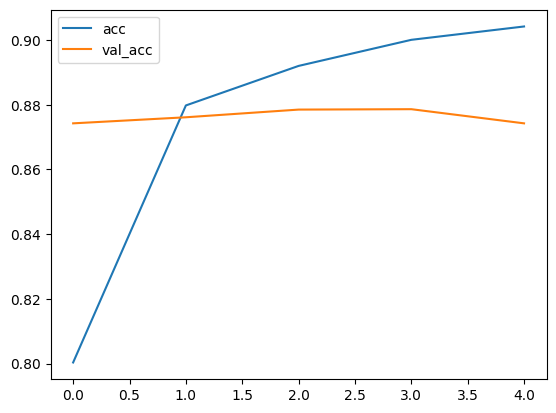

In [13]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
#plt.savefig("Accuracy plot.jpg")

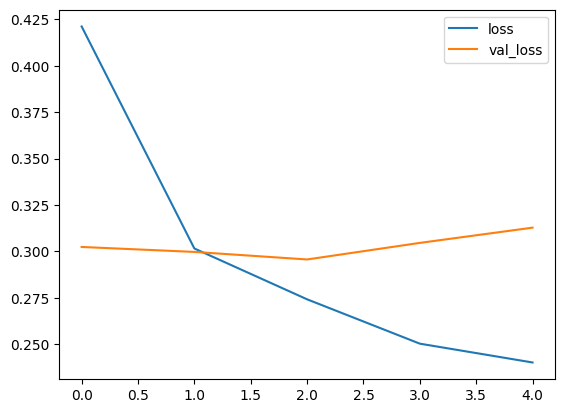

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
#plt.savefig("Loss plot.jpg")

In [17]:
X_test = pd.read_csv("./Test.csv")
X_test_seq = tokenizer.texts_to_sequences(X_test['text'])
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

loss, accuracy = model.evaluate(X_test_pad, X_test['label'])

print('Test set loss:', loss)
print('Test set accuracy:', accuracy)

157/157 [==============================] - 10s 55ms/step - loss: 0.4386 - accuracy: 0.8036
Test set loss: 0.43863266706466675
Test set accuracy: 0.803600013256073


In [18]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])